# Graphs and Analysis

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Plot Train and Val Loss

In [37]:
def plot_training_loss(log_history):
#     train_state_df = pd.DataFrame(trainer.state.log_history, columns=["epoch", "step", "loss", "eval_loss"])
    training_loss = [log["loss"] for log in log_history if "loss" in log and "step" in log]
    validation_loss = [log["eval_loss"] for log in log_history if "eval_loss" in log]
    end_step = min(len(training_loss), len(validation_loss))
    training_loss = training_loss[:end_step]
    validation_loss = validation_loss[:end_step]
    
    steps = [log["step"] for log in log_history if "loss" in log][:end_step]
    
    # print(len(training_loss), len(validation_loss), len(steps))
    
    # plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(steps, training_loss, label="Training Loss", color='blue')
    plt.plot(steps, validation_loss, label="Validation Loss", color='orange')
    
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()



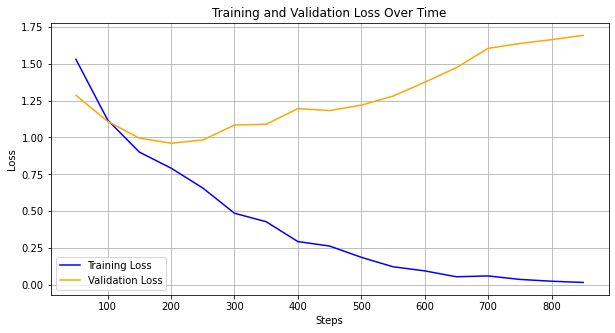

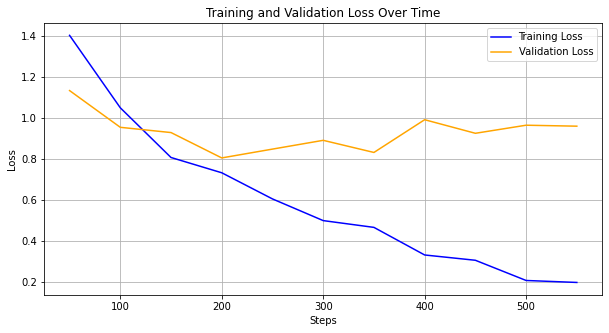

In [78]:
T_STATE_FILES = ["wiki-256-10/trainer_state.json", "all-256-5/trainer_state.json"]
for trainer_state_file in T_STATE_FILES:   
    # Load the training state from the JSON file
    with open(trainer_state_file, 'r') as f:
        trainer_state = json.load(f)
        plot_training_loss(trainer_state["log_history"])

## Plot Metrics

In [115]:
def plot_metrics(df, runs, xlab, title):
    bar_width = 0.1  # Width of the bars
    x = np.arange(len(runs))

    fig, ax = plt.subplots(figsize=(8, 5))
    for i, metric in enumerate(["accuracy", "f1", "precision", "recall"]):
        ax.bar(x - ((2-i)*bar_width) , df[f"test_{metric}"], bar_width, label=metric)

    ax.set_xlabel(xlab)
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(runs)
    ax.legend()
    ax.grid(True)
    plt.show()

In [116]:
RUNS = ["wiki-256-10/", "all-256-5/"]
df = pd.DataFrame()
for run in RUNS:  
    for f in ["test"]: # "train", "eval", 
        with open(run+f+"_results.json", 'r') as f:
            result = json.load(f)
            df = pd.concat([df, pd.DataFrame([result])])

In [117]:
df

,test_accuracy,test_f1,test_loss,test_precision,test_recall,test_runtime,test_samples_per_second,test_steps_per_second
0,0.608955,0.616784,0.971843,0.643601,0.608955,7.5653,132.844,2.115
0,0.648507,0.647969,0.834686,0.663277,0.648507,9.8468,136.085,2.133


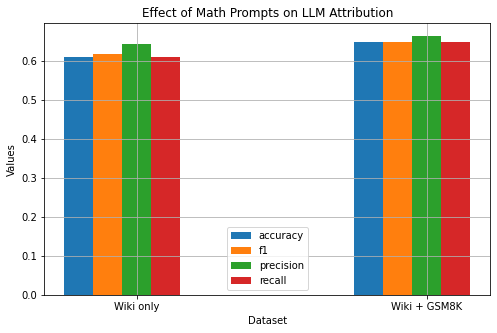

In [118]:
plot_metrics(df, ["Wiki only", "Wiki + GSM8K"], 'Dataset', 'Effect of Math Prompts on LLM Attribution')

In [119]:
RUNS = ["wiki-64-5/", "wiki-128-5/", "wiki-256-10/"]
df = pd.DataFrame()
for run in RUNS:  
    for f in ["test"]: # "train", "eval", 
        with open(run+f+"_results.json", 'r') as f:
            result = json.load(f)
            df = pd.concat([df, pd.DataFrame([result])])
df

,test_accuracy,test_f1,test_loss,test_precision,test_recall,test_runtime,test_samples_per_second,test_steps_per_second
0,0.460697,0.439632,1.299028,0.469816,0.460697,2.2959,437.732,6.969
0,0.519403,0.504732,1.159066,0.518092,0.519403,3.9465,254.656,4.054
0,0.608955,0.616784,0.971843,0.643601,0.608955,7.5653,132.844,2.115


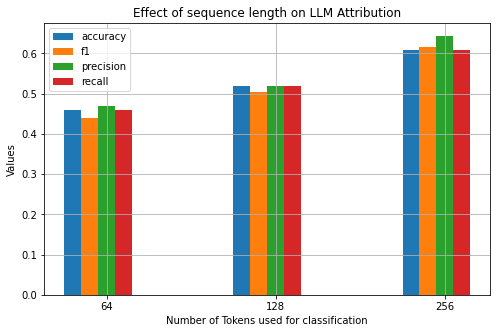

In [120]:
plot_metrics(df, ["64", "128", "256"], "Number of Tokens used for classification", "Effect of sequence length on LLM Attribution")